In [145]:
import sys,os
import numpy as np
import lhapdf
import pylab as py
import pandas as pd
from Numerical.FBT import FBT
from Evolve.kernel_q import kernel_q, alphas
from scipy.integrate import quad,fixed_quad
%matplotlib inline
from scipy.special import gamma,digamma
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib import font_manager
import matplotlib
from matplotlib.pyplot import gca
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator
from scipy.interpolate import interp1d
import random
sizeOfFont = 20
rc('text',usetex=True)
fontProperties = {'weight' : 'normal', 'size' : sizeOfFont}
ticks_font = matplotlib.font_manager.FontProperties(style='normal',size=sizeOfFont, weight='normal', stretch='normal')
rc('text',usetex=True)
rc('font',**fontProperties)
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings("ignore")

In [2]:
ffpip=lhapdf.mkPDFs('FDSS_PIP')
def CxFF(z,Q):
    #if Q<1.1:
    #    Q = 1.1
    D = ffpip[0].xfxQ( 1,z,Q)/z
    U = ffpip[0].xfxQ( 2,z,Q)/z
    S = ffpip[0].xfxQ( 3,z,Q)/z
    SB= ffpip[0].xfxQ(-3,z,Q)/z
    UB= ffpip[0].xfxQ(-2,z,Q)/z
    DB= ffpip[0].xfxQ(-1,z,Q)/z
    return 0,D,U,S,SB,UB,DB

In [3]:
pdfp=lhapdf.mkPDFs('CT14TMD')
def CxPDF(x,Q):
    #if Q<1.1:
    #    Q = 1.1
    D = pdfp[0].xfxQ( 1,x,Q)/x
    U = pdfp[0].xfxQ( 2,x,Q)/x
    S = pdfp[0].xfxQ( 3,x,Q)/x
    SB= pdfp[0].xfxQ(-3,x,Q)/x
    UB= pdfp[0].xfxQ(-2,x,Q)/x
    DB= pdfp[0].xfxQ(-1,x,Q)/x
    return 0,D,U,S,SB,UB,DB

In [4]:
def TMDPDF(x,Q,b):
    bmax = 1.5
    bstar = b/np.sqrt(1.+(b/bmax)**2.)
    c0 = 1.122919
    Q0 = c0/bstar
    Revo = kernel_q(bstar,Q0,Q,Q0,Q,3)
    ggi,DDi,UUi,SSi,SBi,UBi,DBi = CxPDF(x,Q0)
    ktw = 0.424
    kappa2 = 0.84
    Qini = np.sqrt(2.4)
    kappa1 = ktw/4.
    FNP = np.exp( -(kappa1)*b*b-kappa2/2.*np.log(b/bstar)*np.log(Q/Qini) )
    DD= DDi*FNP*Revo
    UU= UUi*FNP*Revo
    SS= SSi*FNP*Revo
    SB= SBi*FNP*Revo
    UB= UBi*FNP*Revo
    DB= DBi*FNP*Revo
    return DD,UU,SS,SB,UB,DB

In [5]:
def TMDFF(z,Q,b):
    bmax = 1.5
    bstar = b/np.sqrt(1.+(b/bmax)**2.)
    c0 = 1.122919
    Q0 = c0/bstar
    Revo = kernel_q(bstar,Q0,Q,Q0,Q,3)
    ggi,DDi,UUi,SSi,SBi,UBi,DBi = CxFF(z,Q0)
    ktw = 0.168
    kappa2 = 0.84
    Qini = np.sqrt(2.4)
    kappa1 = ktw/4./z/z
    FNP = np.exp( -(kappa1)*b*b-kappa2/2.*np.log(b/bstar)*np.log(Q/Qini) )
    DD= DDi*FNP*Revo/z/z
    UU= UUi*FNP*Revo/z/z
    SS= SSi*FNP*Revo/z/z
    SB= SBi*FNP*Revo/z/z
    UB= UBi*FNP*Revo/z/z
    DB= DBi*FNP*Revo/z/z
    return DD,UU,SS,SB,UB,DB

# Check against Fig 10 in 1505.05589

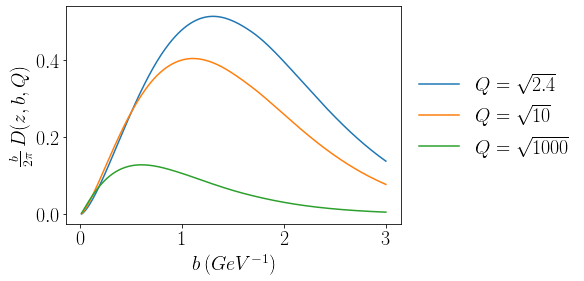

In [6]:
z = 0.4
b = np.linspace(1e-2,3,300)
Q = np.sqrt(2.4)
FF24 = [bb*TMDFF(z,Q,bb)[1]/2./np.pi for bb in b]
Q = np.sqrt(10.)
FF10 = [bb*TMDFF(z,Q,bb)[1]/2./np.pi for bb in b]
Q = np.sqrt(1e3)
FF1000 = [bb*TMDFF(z,Q,bb)[1]/2./np.pi for bb in b]
ax = py.subplot(111)
ax.plot(b,FF24,label = r"\rm $Q = \sqrt{2.4}$")
ax.plot(b,FF10,label = r"\rm $Q = \sqrt{10}$")
ax.plot(b,FF1000,label = r"\rm $Q = \sqrt{1000}$")
ax.set_ylabel(r"\rm $\frac{b}{2\pi}\, D(z,b,Q)$")
ax.set_xlabel(r"\rm $b\, (GeV^{-1})$")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon = False)
py.show()

# Check against Fig 8 in 1505.05589

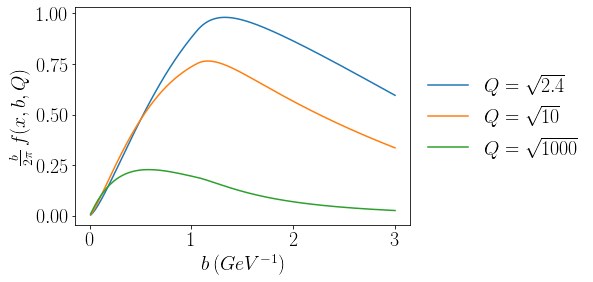

In [7]:
x = 0.1
b = np.linspace(1e-2,3,300)
Q = np.sqrt(2.4)
PDF24 = [bb*TMDPDF(x,Q,bb)[1]/2./np.pi for bb in b]
Q = np.sqrt(10.)
PDF10 = [bb*TMDPDF(x,Q,bb)[1]/2./np.pi for bb in b]
Q = np.sqrt(1e3)
PDF1000 = [bb*TMDPDF(x,Q,bb)[1]/2./np.pi for bb in b]
ax = py.subplot(111)
ax.plot(b,PDF24,label = r"\rm $Q = \sqrt{2.4}$")
ax.plot(b,PDF10,label = r"\rm $Q = \sqrt{10}$")
ax.plot(b,PDF1000,label = r"\rm $Q = \sqrt{1000}$")
ax.set_ylabel(r"\rm $\frac{b}{2\pi}\, f(x,b,Q)$")
ax.set_xlabel(r"\rm $b\, (GeV^{-1})$")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon = False)
py.show()

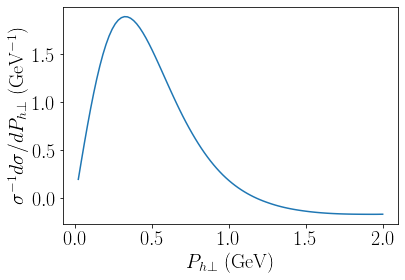

In [8]:
fbt0 = FBT(0)
def FUU_b_epem(b,z1,z2,Q):
    DD1,UU1,SS1,SB1,UB1,DB1 = TMDFF(z,Q,b)
    DD2,UU2,SS2,SB2,UB2,DB2 = TMDFF(z,Q,b)
    als = alphas(Q)
    CF = 4./3.
    HQ = 1+als*CF/2./np.pi*(np.pi**2.-8.)
    eu2 = 4./9.
    ed2 = 1./9.
    return 1./z1/z1*HQ*(eu2*(UU1*UB2+UU2*UB1)+ed2*(DD1*DB2+DD2*DB1+SS1*SB2+SS2*SB1))
def FUU_p_epem(PhT,z1,z2,Q):
    FUUb = np.vectorize(lambda b: b*FUU_b_epem(b,z1,z2,Q))
    return fbt0.fbt(FUUb, PhT/z1, 20,Q)
def FUU_pint_epem(z1,z2,Q):
    FUU_p = lambda pT: 2*np.pi*pT*FUU_p_epem(pT,z1,z2,Q)
    return quad(FUU_p,0.,2.)[0]
Q = 10.
z1 = 0.2
z2 = 0.2
ax = py.subplot(111)
PhT = np.linspace(0.02,2.,100,endpoint = True)
norm = FUU_pint_epem(z1,z2,Q)
FUUpT = [2*np.pi*phT*FUU_p_epem(phT,z1,z2,Q)/norm for phT in PhT]
ax.plot(PhT,FUUpT)
ax.set_ylabel(r'\rm $\sigma^{-1} d\sigma/d P_{h \perp}$ (GeV$^{-1}$)',fontsize=sizeOfFont)
ax.set_xlabel(r'\rm $P_{h \perp}$ (GeV)',fontsize=sizeOfFont)
py.show()

In [129]:
params = {}
params['NLO'] = {}
params['NLO']['Au']  = 0.258710
params['NLO']['n1']  = 0.290650
params['NLO']['n2']  = 3.243200
params['NLO']['eu']  = 4.060300
params['NLO']['gu']  = 30.68700

params['NLO']['Ad']  = 12.28800
params['NLO']['n3']  = 0.968090
params['NLO']['n4']  = 2.700300+params['NLO']['n2']
params['NLO']['ed']  =-3.891100
params['NLO']['gd']  = 6.054200

params['NLO']['AS']  = 0.316200
params['NLO']['dS']  =-0.215150
params['NLO']['nS']  = 9.272600
params['NLO']['eS']  =-2.602200
params['NLO']['gS']  = 30.78500

params['NLO']['ID']  = 0.087673
params['NLO']['AD']  = 8.108400
params['NLO']['nD']  = 1.869100
params['NLO']['gD']  = 13.60900
params['NLO']['dD']  =-59.28900

params['NLO']['Ag']  = 1.080500
params['NLO']['dg']  =-0.428480
params['NLO']['ng']  = 3.022500
params['NLO']['eg']  =-2.292200
params['NLO']['gG']  = 3.489400
params['NLO']['Agp'] =-1.116800
params['NLO']['dgp'] =-0.427760
params['NLO']['ngp'] = 32.86900

params['NLO']['Ap']  = 0.047915
params['NLO']['npp'] = 9.746600
params['NLO']['Am']  =-0.011629
params['NLO']['nm']  = 11.26100
params['NLO']['dm']  = 0.200000
params['NLO']['x0']  = 0.016050

params['NLO']['r1']  =-0.576310
params['NLO']['r2']  = 0.818780
params['NLO']['r3']  =-0.083208

In [130]:
Au = params['NLO']['Au']
n1 = params['NLO']['n1']
n2 = params['NLO']['n2']
eu = params['NLO']['eu']
gu = params['NLO']['gu']

Ad = params['NLO']['Ad']
n3 = params['NLO']['n3']
n4 = params['NLO']['n4']
ed = params['NLO']['ed']
gd = params['NLO']['gd']

AS = params['NLO']['AS']
dS = params['NLO']['dS']
nS = params['NLO']['nS']
eS = params['NLO']['eS']
gS = params['NLO']['gS']

AD = params['NLO']['AD']
nD = params['NLO']['nD']
nS = params['NLO']['nS']
gD = params['NLO']['gD']
dD = params['NLO']['dD']

Ap = params['NLO']['Ap']
dS = params['NLO']['dS']
npp= params['NLO']['npp']
eS = params['NLO']['eS']
gS = params['NLO']['gS']

Am = params['NLO']['Am']
dm = params['NLO']['dm']
nm = params['NLO']['nm']
x0 = params['NLO']['x0']

NuuT = 0.85
auuT = 0.69
buuT = 0.05

NddT = -1.
addT = 1.79
bddT = 7.00

NssT = 0.
assT = 0.
bssT = 0.

NsbT = 0.
asbT = 0.
bsbT = 0.

NdbT = 0.
adbT = 0.
bdbT = 0.

NubT = 0.
aubT = 0.
bubT = 0.

Nup = 0.677
aup = 0.692
bup = 3.34
gup = -2.18
nup = 15.87

Ndp = -0.015
adp = 0.164
bdp = 3.89
gdp = 22.40
ndp = 98.94

Nub = 0.295
aub = 0.692
bub = 10.
gub = 0.
nub = -8.42

Ndb = -0.012
adb = 0.164
bdb = 10.
gdb = 0.
ndb = 98.94

Nss = -0.025
ass = 0.164
bss = 10.
gss = 0.
nss = -29.52

In [57]:
def xuvQ0(x):
    return Au*x**n1*(1-x)**n2*(1+eu*sym.sqrt(x)+gu*x)
def xdvQ0(x):
    return Ad*x**n3*(1-x)**n4*(1+ed*sym.sqrt(x)+gd*x)
def xSSQ0(x):
    return AS*x**dS*(1-x)**nS*(1+eS*sym.sqrt(x)+gS*x)
def xDDQ0(x):
    return AD*x**nD*(1-x)**(nS+2)*(1+gD*sym.sqrt(x)+dD*x)
def xspQ0(x):
    return Ap*x**dS*(1-x)**npp*(1+eS*sym.sqrt(x)+gS*x)
def xsmQ0(x):
    return Am*x**dm*(1-x)**nm*(1+x/x0)

In [27]:
import sympy as sym
from sympy.solvers.solveset import linsolve

In [29]:
xuv, xdv, xSS, xDD, xsp, xsm = sym.symbols('xuv, xdv, xSS, xDD, xsp, xsm')
xuu, xdd, xss, xub, xdb, xsb = sym.symbols('xuu, xdd, xss, xub, xdb, xsb')
linsolve([xuv - (xuu - xub), xdv - (xdd - xdb), xSS - (2*(xub + xdb) + xss + xsb), xsp - (xss + xsb), xsm - (xss - xsb), xDD -( xdb - xub)], (xuu, xdd, xss,xub, xdb, xsb))

FiniteSet((-xDD/2 + xSS/4 - xsp/4 + xuv, xDD/2 + xSS/4 + xdv - xsp/4, xsm/2 + xsp/2, -xDD/2 + xSS/4 - xsp/4, xDD/2 + xSS/4 - xsp/4, -xsm/2 + xsp/2))

In [176]:
def xuuf(x):
    return -0.5*xDDQ0(x)+0.25*xSSQ0(x)-0.25*xspQ0(x)+xuvQ0(x)
def xddf(x):
    return  0.5*xDDQ0(x)+0.25*xSSQ0(x)-0.25*xspQ0(x)+xdvQ0(x)
def xssf(x):
    return  0.5*(xspQ0(x)+xsmQ0(x))
def xubf(x):
    return -0.5*xDDQ0(x)+0.25*xSSQ0(x)-0.25*xspQ0(x)
def xdbf(x):
    return  0.5*xDDQ0(x)+0.25*xSSQ0(x)-0.25*xspQ0(x)
def xsbf(x):
    return  0.5*(-xsmQ0(x)+xspQ0(x))

In [177]:
def xuug(x):
    return Nup*x**aup*(1 - x)**bup*(1 + gup*np.sqrt(x) + nup*x)-(xubg(x))
def xddg(x):
    return Ndp*x**adp*(1 - x)**bdp*(1 + gdp*np.sqrt(x) + ndp*x)-(xdbg(x))
def xubg(x):
    return Nub*x**aub*(1 - x)**bub*(1 + gub*np.sqrt(x) + nub*x)
def xdbg(x):
    return Ndb*x**adb*(1 - x)**bdb*(1 + gdb*np.sqrt(x) + ndb*x)
def xssg(x):
    return Nss*x**ass*(1 - x)**bss*(1 + gss*np.sqrt(x) + nss*x)

In [178]:
def CDKTuuxQ0(x):
    return NuuT*x**(auuT-1)*(1-x)**buuT*(auuT+buuT)**(auuT+buuT)/auuT**auuT/buuT**buuT*0.5*(xuuf(x)+xuug(x))
def CDKTddxQ0(x):
    return NuuT*x**(auuT-1)*(1-x)**buuT*(auuT+buuT)**(auuT+buuT)/auuT**auuT/buuT**buuT*0.5*(xuuf(x)+xuug(x))

In [170]:
def CDKTuuQ0(n):
    pref = (auuT+buuT)**(auuT+buuT)/auuT**auuT/buuT**buuT
    val =  \
    -(Nub*NuuT*gamma(-1 + n + aub + auuT)*gamma(1 + bub + buuT))/(2.*gamma(n + aub + auuT + bub + buuT)) - \
    (Nub*NuuT*gub*gamma(-0.5 + n + aub + auuT)*gamma(1 + bub + buuT))/(2.*gamma(0.5 + n + aub + auuT + bub + buuT)) - \
    (Nub*NuuT*nub*gamma(n + aub + auuT)*gamma(1 + bub + buuT))/(2.*gamma(1 + n + aub + auuT + bub + buuT)) + \
    (Nup*NuuT*gamma(-1 + n + aup + auuT)*gamma(1 + bup + buuT))/(2.*gamma(n + aup + auuT + bup + buuT)) + \
    (Nup*NuuT*gup*gamma(-0.5 + n + aup + auuT)*gamma(1 + bup + buuT))/(2.*gamma(0.5 + n + aup + auuT + bup + buuT)) + \
    (Nup*NuuT*nup*gamma(n + aup + auuT)*gamma(1 + bup + buuT))/(2.*gamma(1 + n + aup + auuT + bup + buuT)) + \
    (Au*NuuT*gamma(-1 + n + auuT + n1)*gamma(1 + buuT + n2))/(2.*gamma(n + auuT + buuT + n1 + n2)) + \
    (Au*NuuT*eu*gamma(-0.5 + n + auuT + n1)*gamma(1 + buuT + n2))/(2.*gamma(0.5 + n + auuT + buuT + n1 + n2)) + \
    (Au*NuuT*gu*gamma(n + auuT + n1)*gamma(1 + buuT + n2))/(2.*gamma(1 + n + auuT + buuT + n1 + n2)) - \
    (Ap*NuuT*gamma(-1 + n + auuT + dS)*gamma(1 + buuT + npp))/(8.*gamma(n + auuT + buuT + dS + npp)) - \
    (Ap*NuuT*eS*gamma(-0.5 + n + auuT + dS)*gamma(1 + buuT + npp))/(8.*gamma(0.5 + n + auuT + buuT + dS + npp)) - \
    (Ap*NuuT*gS*gamma(n + auuT + dS)*gamma(1 + buuT + npp))/(8.*gamma(1 + n + auuT + buuT + dS + npp)) + \
    (AS*NuuT*gamma(-1 + n + auuT + dS)*gamma(1 + buuT + nS))/(8.*gamma(n + auuT + buuT + dS + nS)) + \
    (AS*NuuT*eS*gamma(-0.5 + n + auuT + dS)*gamma(1 + buuT + nS))/(8.*gamma(0.5 + n + auuT + buuT + dS + nS)) + \
    (AS*NuuT*gS*gamma(n + auuT + dS)*gamma(1 + buuT + nS))/(8.*gamma(1 + n + auuT + buuT + dS + nS)) - \
    (AD*NuuT*gamma(1 + buuT + nS)*gamma(-1 + n + auuT + nD))/(4.*gamma(n + auuT + buuT + nS + nD)) - \
    (AD*NuuT*gD*gamma(1 + buuT + nS)*gamma(-0.5 + n + auuT + nD))/(4.*gamma(0.5 + n + auuT + buuT + nS + nD)) + \
    (AD*NuuT*gamma(1 + buuT + nS)*gamma(n + auuT + nD))/(2.*gamma(1 + n + auuT + buuT + nS + nD)) - \
    (AD*NuuT*dD*gamma(1 + buuT + nS)*gamma(n + auuT + nD))/(4.*gamma(1 + n + auuT + buuT + nS + nD)) + \
    (AD*NuuT*gD*gamma(1 + buuT + nS)*gamma(0.5 + n + auuT + nD))/(2.*gamma(1.5 + n + auuT + buuT + nS + nD)) - \
    (AD*NuuT*gamma(1 + buuT + nS)*gamma(1 + n + auuT + nD))/(4.*gamma(2 + n + auuT + buuT + nS + nD)) + \
    (AD*NuuT*dD*gamma(1 + buuT + nS)*gamma(1 + n + auuT + nD))/(2.*gamma(2 + n + auuT + buuT + nS + nD)) - \
    (AD*NuuT*gD*gamma(1 + buuT + nS)*gamma(1.5 + n + auuT + nD))/(4.*gamma(2.5 + n + auuT + buuT + nS + nD)) - \
    (AD*NuuT*dD*gamma(1 + buuT + nS)*gamma(2 + n + auuT + nD))/(4.*gamma(3 + n + auuT + buuT + nS + nD))
    return pref*val
def CDKTddQ0(n):
    pref = (addT+bddT)**(addT+bddT)/addT**addT/bddT**bddT
    val = \
    -(Ndb*NddT*gamma(-1 + n + adb + addT)*gamma(1 + bdb + bddT))/(2.*gamma(n + adb + addT + bdb + bddT)) - \
    (Ndb*NddT*gdb*gamma(-0.5 + n + adb + addT)*gamma(1 + bdb + bddT))/(2.*gamma(0.5 + n + adb + addT + bdb + bddT)) - \
    (Ndb*NddT*ndb*gamma(n + adb + addT)*gamma(1 + bdb + bddT))/(2.*gamma(1 + n + adb + addT + bdb + bddT)) + \
    (NddT*Ndp*gamma(-1 + n + addT + adp)*gamma(1 + bddT + bdp))/(2.*gamma(n + addT + adp + bddT + bdp)) + \
    (NddT*Ndp*gdp*gamma(-0.5 + n + addT + adp)*gamma(1 + bddT + bdp))/(2.*gamma(0.5 + n + addT + adp + bddT + bdp)) + \
    (NddT*Ndp*ndp*gamma(n + addT + adp)*gamma(1 + bddT + bdp))/(2.*gamma(1 + n + addT + adp + bddT + bdp)) + \
    (Ad*NddT*gamma(-1 + n + addT + n3)*gamma(1 + bddT + n4))/(2.*gamma(n + addT + bddT + n3 + n4)) + \
    (Ad*NddT*ed*gamma(-0.5 + n + addT + n3)*gamma(1 + bddT + n4))/(2.*gamma(0.5 + n + addT + bddT + n3 + n4)) + \
    (Ad*NddT*gd*gamma(n + addT + n3)*gamma(1 + bddT + n4))/(2.*gamma(1 + n + addT + bddT + n3 + n4)) - \
    (Ap*NddT*gamma(-1 + n + addT + dS)*gamma(1 + bddT + npp))/(8.*gamma(n + addT + bddT + dS + npp)) - \
    (Ap*NddT*eS*gamma(-0.5 + n + addT + dS)*gamma(1 + bddT + npp))/(8.*gamma(0.5 + n + addT + bddT + dS + npp)) - \
    (Ap*NddT*gS*gamma(n + addT + dS)*gamma(1 + bddT + npp))/(8.*gamma(1 + n + addT + bddT + dS + npp)) + \
    (AS*NddT*gamma(-1 + n + addT + dS)*gamma(1 + bddT + nS))/(8.*gamma(n + addT + bddT + dS + nS)) + \
    (AS*NddT*eS*gamma(-0.5 + n + addT + dS)*gamma(1 + bddT + nS))/(8.*gamma(0.5 + n + addT + bddT + dS + nS)) + \
    (AS*NddT*gS*gamma(n + addT + dS)*gamma(1 + bddT + nS))/(8.*gamma(1 + n + addT + bddT + dS + nS)) + \
    (AD*NddT*gamma(1 + bddT + nS)*gamma(-1 + n + addT + nD))/(4.*gamma(n + addT + bddT + nS + nD)) + \
    (AD*NddT*gD*gamma(1 + bddT + nS)*gamma(-0.5 + n + addT + nD))/(4.*gamma(0.5 + n + addT + bddT + nS + nD)) - \
    (AD*NddT*gamma(1 + bddT + nS)*gamma(n + addT + nD))/(2.*gamma(1 + n + addT + bddT + nS + nD)) + \
    (AD*NddT*dD*gamma(1 + bddT + nS)*gamma(n + addT + nD))/(4.*gamma(1 + n + addT + bddT + nS + nD)) - \
    (AD*NddT*gD*gamma(1 + bddT + nS)*gamma(0.5 + n + addT + nD))/(2.*gamma(1.5 + n + addT + bddT + nS + nD)) + \
    (AD*NddT*gamma(1 + bddT + nS)*gamma(1 + n + addT + nD))/(4.*gamma(2 + n + addT + bddT + nS + nD)) - \
    (AD*NddT*dD*gamma(1 + bddT + nS)*gamma(1 + n + addT + nD))/(2.*gamma(2 + n + addT + bddT + nS + nD)) + \
    (AD*NddT*gD*gamma(1 + bddT + nS)*gamma(1.5 + n + addT + nD))/(4.*gamma(2.5 + n + addT + bddT + nS + nD)) + \
    (AD*NddT*dD*gamma(1 + bddT + nS)*gamma(2 + n + addT + nD))/(4.*gamma(3 + n + addT + bddT + nS + nD))
    return pref*val
def CDKTssQ0(n):
    pref = (assT+bssT)**(assT+bssT)/assT**assT/bssT**bssT
    val = \
    (Nss*NssT*gamma(-1 + n + ass + assT)*gamma(1 + bss + bssT))/(2.*gamma(n + ass + assT + bss + bssT)) + \
    (Nss*NssT*gss*gamma(-0.5 + n + ass + assT)*gamma(1 + bss + bssT))/(2.*gamma(0.5 + n + ass + assT + bss + bssT)) + \
    (Nss*NssT*nss*gamma(n + ass + assT)*gamma(1 + bss + bssT))/(2.*gamma(1 + n + ass + assT + bss + bssT)) + \
    (Am*NssT*gamma(-1 + n + assT + dm)*gamma(1 + bssT + nm))/(4.*gamma(n + assT + bssT + dm + nm)) - \
    (Am*NssT*gamma(n + assT + dm)*gamma(1 + bssT + nm))/(4.*x0*gamma(1 + n + assT + bssT + dm + nm)) + \
    (Ap*NssT*gamma(-1 + n + assT + dS)*gamma(1 + bssT + npp))/(4.*gamma(n + assT + bssT + dS + npp)) + \
    (Ap*NssT*eS*gamma(-0.5 + n + assT + dS)*gamma(1 + bssT + npp))/(4.*gamma(0.5 + n + assT + bssT + dS + npp)) + \
    (Ap*NssT*gS*gamma(n + assT + dS)*gamma(1 + bssT + npp))/(4.*gamma(1 + n + assT + bssT + dS + npp))
    return val*pref
def CDKTubQ0(n):
    pref = (aubT+bubT)**(aubT+bubT)/aubT**aubT/bubT**bubT
    return \
    (Nub*NubT*gamma(-1 + n + aub + aubT)*gamma(1 + bub + bubT))/(2.*gamma(n + aub + aubT + bub + bubT)) + \
    (Nub*NubT*gub*gamma(-0.5 + n + aub + aubT)*gamma(1 + bub + bubT))/(2.*gamma(0.5 + n + aub + aubT + bub + bubT)) + \
    (Nub*NubT*nub*gamma(n + aub + aubT)*gamma(1 + bub + bubT))/(2.*gamma(1 + n + aub + aubT + bub + bubT)) - \
    (Ap*NubT*gamma(-1 + n + aubT + dS)*gamma(1 + bubT + npp))/(8.*gamma(n + aubT + bubT + dS + npp)) - \
    (Ap*NubT*eS*gamma(-0.5 + n + aubT + dS)*gamma(1 + bubT + npp))/(8.*gamma(0.5 + n + aubT + bubT + dS + npp)) - \
    (Ap*NubT*gS*gamma(n + aubT + dS)*gamma(1 + bubT + npp))/(8.*gamma(1 + n + aubT + bubT + dS + npp)) + \
    (AS*NubT*gamma(-1 + n + aubT + dS)*gamma(1 + bubT + nS))/(8.*gamma(n + aubT + bubT + dS + nS)) + \
    (AS*NubT*eS*gamma(-0.5 + n + aubT + dS)*gamma(1 + bubT + nS))/(8.*gamma(0.5 + n + aubT + bubT + dS + nS)) + \
    (AS*NubT*gS*gamma(n + aubT + dS)*gamma(1 + bubT + nS))/(8.*gamma(1 + n + aubT + bubT + dS + nS)) - \
    (AD*NubT*gamma(1 + bubT + nS)*gamma(-1 + n + aubT + nD))/(4.*gamma(n + aubT + bubT + nS + nD)) - \
    (AD*NubT*gD*gamma(1 + bubT + nS)*gamma(-0.5 + n + aubT + nD))/(4.*gamma(0.5 + n + aubT + bubT + nS + nD)) + \
    (AD*NubT*gamma(1 + bubT + nS)*gamma(n + aubT + nD))/(2.*gamma(1 + n + aubT + bubT + nS + nD)) - \
    (AD*NubT*dD*gamma(1 + bubT + nS)*gamma(n + aubT + nD))/(4.*gamma(1 + n + aubT + bubT + nS + nD)) + \
    (AD*NubT*gD*gamma(1 + bubT + nS)*gamma(0.5 + n + aubT + nD))/(2.*gamma(1.5 + n + aubT + bubT + nS + nD)) - \
    (AD*NubT*gamma(1 + bubT + nS)*gamma(1 + n + aubT + nD))/(4.*gamma(2 + n + aubT + bubT + nS + nD)) + \
    (AD*NubT*dD*gamma(1 + bubT + nS)*gamma(1 + n + aubT + nD))/(2.*gamma(2 + n + aubT + bubT + nS + nD)) - \
    (AD*NubT*gD*gamma(1 + bubT + nS)*gamma(1.5 + n + aubT + nD))/(4.*gamma(2.5 + n + aubT + bubT + nS + nD)) - \
    (AD*NubT*dD*gamma(1 + bubT + nS)*gamma(2 + n + aubT + nD))/(4.*gamma(3 + n + aubT + bubT + nS + nD))
    return val*pref
def CDKTdbQ0(n):
    pref = (adbT+bdbT)**(adbT+bdbT)/adbT**adbT/bdbT**bdbT
    val = \
    (Ndb*NdbT*gamma(-1 + n + adb + adbT)*gamma(1 + bdb + bdbT))/(2.*gamma(n + adb + adbT + bdb + bdbT)) + \
    (Ndb*NdbT*gdb*gamma(-0.5 + n + adb + adbT)*gamma(1 + bdb + bdbT))/(2.*gamma(0.5 + n + adb + adbT + bdb + bdbT)) + \
    (Ndb*NdbT*ndb*gamma(n + adb + adbT)*gamma(1 + bdb + bdbT))/(2.*gamma(1 + n + adb + adbT + bdb + bdbT)) - \
    (Ap*NdbT*gamma(-1 + n + adbT + dS)*gamma(1 + bdbT + npp))/(8.*gamma(n + adbT + bdbT + dS + npp)) - \
    (Ap*NdbT*eS*gamma(-0.5 + n + adbT + dS)*gamma(1 + bdbT + npp))/(8.*gamma(0.5 + n + adbT + bdbT + dS + npp)) - \
    (Ap*NdbT*gS*gamma(n + adbT + dS)*gamma(1 + bdbT + npp))/(8.*gamma(1 + n + adbT + bdbT + dS + npp)) + \
    (AS*NdbT*gamma(-1 + n + adbT + dS)*gamma(1 + bdbT + nS))/(8.*gamma(n + adbT + bdbT + dS + nS)) + \
    (AS*NdbT*eS*gamma(-0.5 + n + adbT + dS)*gamma(1 + bdbT + nS))/(8.*gamma(0.5 + n + adbT + bdbT + dS + nS)) + \
    (AS*NdbT*gS*gamma(n + adbT + dS)*gamma(1 + bdbT + nS))/(8.*gamma(1 + n + adbT + bdbT + dS + nS)) + \
    (AD*NdbT*gamma(1 + bdbT + nS)*gamma(-1 + n + adbT + nD))/(4.*gamma(n + adbT + bdbT + nS + nD)) + \
    (AD*NdbT*gD*gamma(1 + bdbT + nS)*gamma(-0.5 + n + adbT + nD))/(4.*gamma(0.5 + n + adbT + bdbT + nS + nD)) - \
    (AD*NdbT*gamma(1 + bdbT + nS)*gamma(n + adbT + nD))/(2.*gamma(1 + n + adbT + bdbT + nS + nD)) + \
    (AD*NdbT*dD*gamma(1 + bdbT + nS)*gamma(n + adbT + nD))/(4.*gamma(1 + n + adbT + bdbT + nS + nD)) - \
    (AD*NdbT*gD*gamma(1 + bdbT + nS)*gamma(0.5 + n + adbT + nD))/(2.*gamma(1.5 + n + adbT + bdbT + nS + nD)) + \
    (AD*NdbT*gamma(1 + bdbT + nS)*gamma(1 + n + adbT + nD))/(4.*gamma(2 + n + adbT + bdbT + nS + nD)) - \
    (AD*NdbT*dD*gamma(1 + bdbT + nS)*gamma(1 + n + adbT + nD))/(2.*gamma(2 + n + adbT + bdbT + nS + nD)) + \
    (AD*NdbT*gD*gamma(1 + bdbT + nS)*gamma(1.5 + n + adbT + nD))/(4.*gamma(2.5 + n + adbT + bdbT + nS + nD)) + \
    (AD*NdbT*dD*gamma(1 + bdbT + nS)*gamma(2 + n + adbT + nD))/(4.*gamma(3 + n + adbT + bdbT + nS + nD))
    return val*pref
def CDKTsbQ0(n):
    pref = (asbT+bsbT)**(asbT+bsbT)/asbT**asbT/bsbT**bsbT
    val = \
    (NsbT*Nss*gamma(-1 + n + asbT + ass)*gamma(1 + bsbT + bss))/(2.*gamma(n + asbT + ass + bsbT + bss)) + \
    (NsbT*Nss*gss*gamma(-0.5 + n + asbT + ass)*gamma(1 + bsbT + bss))/(2.*gamma(0.5 + n + asbT + ass + bsbT + bss)) + \
    (NsbT*Nss*nss*gamma(n + asbT + ass)*gamma(1 + bsbT + bss))/(2.*gamma(1 + n + asbT + ass + bsbT + bss)) - \
    (Am*NsbT*gamma(-1 + n + asbT + dm)*gamma(1 + bsbT + nm))/(4.*gamma(n + asbT + bsbT + dm + nm)) + \
    (Am*NsbT*gamma(n + asbT + dm)*gamma(1 + bsbT + nm))/(4.*x0*gamma(1 + n + asbT + bsbT + dm + nm)) + \
    (Ap*NsbT*gamma(-1 + n + asbT + dS)*gamma(1 + bsbT + npp))/(4.*gamma(n + asbT + bsbT + dS + npp)) + \
    (Ap*NsbT*eS*gamma(-0.5 + n + asbT + dS)*gamma(1 + bsbT + npp))/(4.*gamma(0.5 + n + asbT + bsbT + dS + npp)) + \
    (Ap*NsbT*gS*gamma(n + asbT + dS)*gamma(1 + bsbT + npp))/(4.*gamma(1 + n + asbT + bsbT + dS + npp))
    return val*pref

In [171]:
def Pqqh1(n):
    return 4./3.*(-2.*(digamma(n)+1./n+np.euler_gamma)+1.5)

In [172]:
def CDKTuuQ(n,Q):
    mc = 1.275
    mb = 4.5
    if Q<= mc:
        nf = 6.
        b0 = 11.-2./3.*nf
        evo  = (alphas(Q)/alphas(1.))**(-Pqqh1(n)/b0)
    elif Q<= mb:
        nf = 6.
        b0 = 11.-2./3.*nf
        evoc = (alphas(mc)/alphas(1.))**(-Pqqh1(n)/b0)
        nf = 8.
        b0 = 11.-2./3.*nf
        evob = (alphas(Q )/alphas(mc))**(-Pqqh1(n)/b0)
        evo  = evoc*evob
    elif Q > mb:
        nf = 6.
        b0 = 11.-2./3.*nf
        evoc = (alphas(mc)/alphas(1.))**(-Pqqh1(n)/b0)
        nf = 8.
        b0 = 11.-2./3.*nf
        evob = (alphas(mb)/alphas(mc))**(-Pqqh1(n)/b0)
        nf = 10.
        b0 = 11.-2./3.*nf
        evoQ = (alphas(Q )/alphas(mb))**(-Pqqh1(n)/b0)
        evo  = evoc*evob*evoQ
    return CDKTuuQ0(n)*evo
def CDKTddQ(n,Q):
    mc = 1.275
    mb = 4.5
    if Q<= mc:
        nf = 6.
        b0 = 11.-2./3.*nf
        evo  = (alphas(Q)/alphas(1.))**(-Pqqh1(n)/b0)
    elif Q<= mb:
        nf = 6.
        b0 = 11.-2./3.*nf
        evoc = (alphas(mc)/alphas(1.))**(-Pqqh1(n)/b0)
        nf = 8.
        b0 = 11.-2./3.*nf
        evob = (alphas(Q )/alphas(mc))**(-Pqqh1(n)/b0)
        evo  = evoc*evob
    elif Q > mb:
        nf = 6.
        b0 = 11.-2./3.*nf
        evoc = (alphas(mc)/alphas(1.))**(-Pqqh1(n)/b0)
        nf = 8.
        b0 = 11.-2./3.*nf
        evob = (alphas(mb)/alphas(mc))**(-Pqqh1(n)/b0)
        nf = 10.
        b0 = 11.-2./3.*nf
        evoQ = (alphas(Q )/alphas(mb))**(-Pqqh1(n)/b0)
        evo  = evoc*evob*evoQ
        return CDKTddQ0(n)
def CDKTssQ(n,Q):
    mc = 1.275
    mb = 4.5
    if Q<= mc:
        nf = 6.
        b0 = 11.-2./3.*nf
        evo  = (alphas(Q)/alphas(1.))**(-Pqqh1(n)/b0)
    elif Q<= mb:
        nf = 6.
        b0 = 11.-2./3.*nf
        evoc = (alphas(mc)/alphas(1.))**(-Pqqh1(n)/b0)
        nf = 8.
        b0 = 11.-2./3.*nf
        evob = (alphas(Q )/alphas(mc))**(-Pqqh1(n)/b0)
        evo  = evoc*evob
    elif Q > mb:
        nf = 6.
        b0 = 11.-2./3.*nf
        evoc = (alphas(mc)/alphas(1.))**(-Pqqh1(n)/b0)
        nf = 8.
        b0 = 11.-2./3.*nf
        evob = (alphas(mb)/alphas(mc))**(-Pqqh1(n)/b0)
        nf = 10.
        b0 = 11.-2./3.*nf
        evoQ = (alphas(Q )/alphas(mb))**(-Pqqh1(n)/b0)
        evo  = evoc*evob*evoQ
        return CDKTssQ0(n)
def CDKTubQ(n,Q):
    mc = 1.275
    mb = 4.5
    if Q<= mc:
        nf = 6.
        b0 = 11.-2./3.*nf
        evo  = (alphas(Q)/alphas(1.))**(-Pqqh1(n)/b0)
    elif Q<= mb:
        nf = 6.
        b0 = 11.-2./3.*nf
        evoc = (alphas(mc)/alphas(1.))**(-Pqqh1(n)/b0)
        nf = 8.
        b0 = 11.-2./3.*nf
        evob = (alphas(Q )/alphas(mc))**(-Pqqh1(n)/b0)
        evo  = evoc*evob
    elif Q > mb:
        nf = 6.
        b0 = 11.-2./3.*nf
        evoc = (alphas(mc)/alphas(1.))**(-Pqqh1(n)/b0)
        nf = 8.
        b0 = 11.-2./3.*nf
        evob = (alphas(mb)/alphas(mc))**(-Pqqh1(n)/b0)
        nf = 10.
        b0 = 11.-2./3.*nf
        evoQ = (alphas(Q )/alphas(mb))**(-Pqqh1(n)/b0)
        evo  = evoc*evob*evoQ
        return CDKTubQ0(n)
def CDKTdbQ(n,Q):
    mc = 1.275
    mb = 4.5
    if Q<= mc:
        nf = 6.
        b0 = 11.-2./3.*nf
        evo  = (alphas(Q)/alphas(1.))**(-Pqqh1(n)/b0)
    elif Q<= mb:
        nf = 6.
        b0 = 11.-2./3.*nf
        evoc = (alphas(mc)/alphas(1.))**(-Pqqh1(n)/b0)
        nf = 8.
        b0 = 11.-2./3.*nf
        evob = (alphas(Q )/alphas(mc))**(-Pqqh1(n)/b0)
        evo  = evoc*evob
    elif Q > mb:
        nf = 6.
        b0 = 11.-2./3.*nf
        evoc = (alphas(mc)/alphas(1.))**(-Pqqh1(n)/b0)
        nf = 8.
        b0 = 11.-2./3.*nf
        evob = (alphas(mb)/alphas(mc))**(-Pqqh1(n)/b0)
        nf = 10.
        b0 = 11.-2./3.*nf
        evoQ = (alphas(Q )/alphas(mb))**(-Pqqh1(n)/b0)
        evo  = evoc*evob*evoQ
    return CDKTdbQ0(n)
def CDKTsbQ(n,Q):
    mc = 1.275
    mb = 4.5
    if Q<= mc:
        nf = 6.
        b0 = 11.-2./3.*nf
        evo  = (alphas(Q)/alphas(1.))**(-Pqqh1(n)/b0)
    elif Q<= mb:
        nf = 6.
        b0 = 11.-2./3.*nf
        evoc = (alphas(mc)/alphas(1.))**(-Pqqh1(n)/b0)
        nf = 8.
        b0 = 11.-2./3.*nf
        evob = (alphas(Q )/alphas(mc))**(-Pqqh1(n)/b0)
        evo  = evoc*evob
    elif Q > mb:
        nf = 6.
        b0 = 11.-2./3.*nf
        evoc = (alphas(mc)/alphas(1.))**(-Pqqh1(n)/b0)
        nf = 8.
        b0 = 11.-2./3.*nf
        evob = (alphas(mb)/alphas(mc))**(-Pqqh1(n)/b0)
        nf = 10.
        b0 = 11.-2./3.*nf
        evoQ = (alphas(Q )/alphas(mb))**(-Pqqh1(n)/b0)
        evo  = evoc*evob*evoQ
        return CDKTsbQ0(n)

In [173]:
def CDKTuuxQ(x,Q):
    phi = 3.*np.pi/4.
    c = 2.
    integrand = lambda z: 1./np.pi*np.imag(np.exp(1j*phi)*x**(-c-z*np.exp(1j*phi))*CDKTuuQ(c+z*np.exp(1j*phi),Q))
    return quad(integrand,0.,10.,epsabs = 0.,epsrel = 0.05)[0]

In [179]:
Q10 = 10.
x = np.linspace(0.1,1,100)
T10 = [CDKTuuxQ( xx,Q10) for xx in x]
Q1 = 1.
T1  = [CDKTuuxQ( xx,Q1 ) for xx in x]
T1x = [CDKTuuxQ0(xx    ) for xx in x]

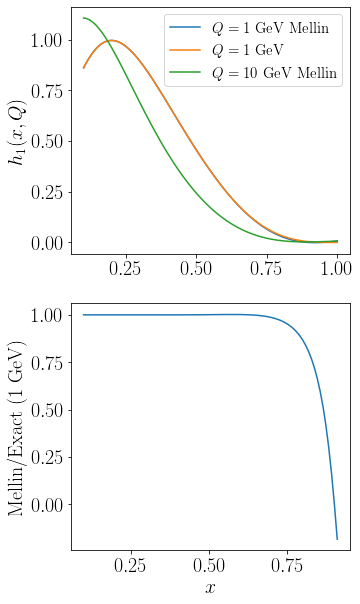

In [198]:
fig = py.figure(figsize = (5,10))
ax = py.subplot(211)
ax.plot(x,T1 ,label = r"\rm $Q = 1$ GeV Mellin")
ax.plot(x,T1x,label = r"\rm $Q = 1$ GeV")
ax.plot(x,T10,label = r"\rm $Q = 10$ GeV Mellin")
ax.legend(fontsize = 15)
ax.set_ylabel(r"\rm $h_1(x,Q)$")
ratio = []
for i in range(len(T1)):
    rat = T1[i]/T1x[i]
    ratio.append(rat)
ax = py.subplot(212)
ax.set_ylabel(r"\rm Mellin/Exact (1 GeV)")
ax.set_xlabel(r"\rm $x$")
ax.plot(x[:90],ratio[:90])
py.show()